In [16]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [7]:
dataset.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [8]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [9]:
dataset["Position"].unique

<bound method Series.unique of 0     Business Analyst
1    Junior Consultant
2    Senior Consultant
3              Manager
4      Country Manager
5       Region Manager
6              Partner
7       Senior Partner
8              C-level
9                  CEO
Name: Position, dtype: object>

In [10]:
# Dataset with non linear regression models.

X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [15]:
# Training the linear regression models

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [27]:
# Training the polynomial regression model

# Creating matrix
poly_reg = PolynomialFeatures(degree = 4)

# tranform the matrix of features to square features
X_poly = poly_reg.fit_transform(X)

# Creating the non linear regression model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

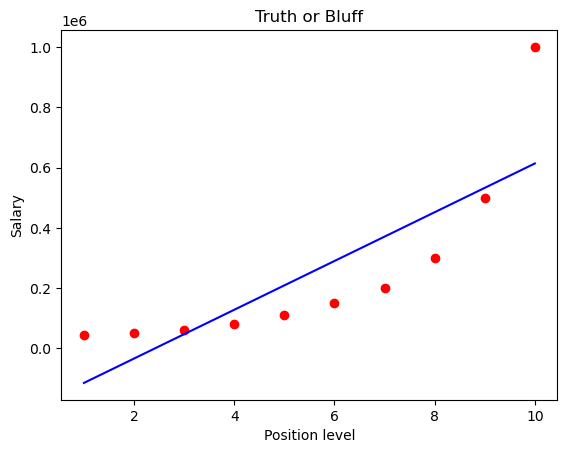

In [28]:
# visualizing the Linear Regression Results

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title("Truth or Bluff")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

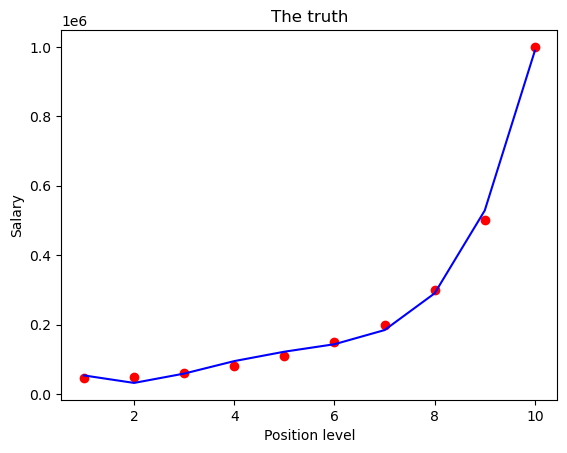

In [29]:
# Visualizing polynomial regression results

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title("The truth")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

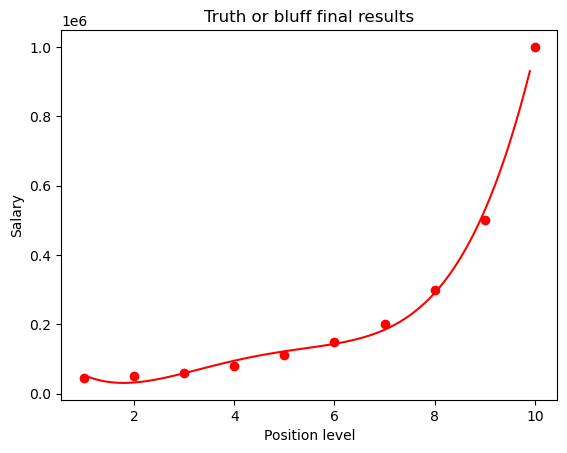

In [30]:
# For smoother curve of polynomial regression.

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'red')
plt.title("Truth or bluff final results")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [31]:
# the above model is over fitted. But this is how we can get the exact result.

In [32]:
# predicting a new result with linear regression

lin_reg.predict([[6.5]])

array([330378.78787879])

In [36]:
# predicting new results with polynomial regression
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265158])